In [2]:
import pandas as pd

In [3]:
cyclones = pd.read_csv(
    "../../data/processed/IBTrACS/filtered_cyclone.csv",
)

In [7]:
coral = pd.read_csv(
    "../../data/processed/CORIS_DATA/ATLANTIC/FLORIDA/Benthic_Cover_Florida_Cleaned.csv"
)

In [6]:

# convert time
cyclones["ISO_TIME"] = pd.to_datetime(cyclones["ISO_TIME"])

# Florida bounding box
lat_min, lat_max = 24, 31
lon_min, lon_max = -87, -80

# filter points near Florida
fl_points = cyclones[
    (cyclones["LAT"] >= lat_min) &
    (cyclones["LAT"] <= lat_max) &
    (cyclones["LON"] >= lon_min) &
    (cyclones["LON"] <= lon_max)
]

# get unique storms that affected Florida
fl_storms = fl_points.drop_duplicates(subset="SID")

# assign year
fl_storms["year"] = fl_storms["ISO_TIME"].dt.year

# count storms per year
cyclones_per_year = fl_storms.groupby("year")["SID"].count()

print(cyclones_per_year)

year
2000    3
2001    2
2002    3
2003    3
2004    5
2005    6
2006    2
2007    3
2008    4
2009    2
2010    2
2012    4
2013    1
2016    4
2017    3
2018    3
2019    3
2020    5
2021    4
2022    3
2023    2
2024    4
2025    1
Name: SID, dtype: int64


/var/folders/25/4sydytjj5kx7w08vfts5w61r0000gn/T/ipykernel_24505/4186669121.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl_storms["year"] = fl_storms["ISO_TIME"].dt.year


In [8]:
coral

,Unnamed: 0,time,latitude,longitude,PRIMARY_SAMPLE_UNIT,YEAR,HABITAT_CD,HABITAT_TYPE,Description,WTD_RUG,...,MPA_NR,PROT,MIN_DEPTH,MAX_DEPTH,METERS_COMPLETED,COVER_CAT_CD,COVER_CAT_NAME,HARDBOTTOM_P,SOFTBOTTOM_P,RUBBLE_P
0,0,UTC,degrees_north,degrees_east,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,m,m,m,NaN,NaN,percent,percent,percent
1,1,2016-06-22T00:00:00Z,24.46499,-81.9823,1702.0,2016.0,CONT_LR,Contiguous reef - non-spur-groove - low vertic...,Mid Channel Patch Reef,0.296667,...,0.0,0.0,7.010399776,7.315199766,15,EUS FAST,Eusmilia fastigiata,1,0,0
2,2,2016-06-22T00:00:00Z,24.46499,-81.9823,1702.0,2016.0,CONT_LR,Contiguous reef - non-spur-groove - low vertic...,Mid Channel Patch Reef,0.296667,...,0.0,0.0,7.010399776,7.315199766,15,GOR ENCR,Encrusting gorgonian,2,0,0
3,3,2016-06-22T00:00:00Z,24.46499,-81.9823,1702.0,2016.0,CONT_LR,Contiguous reef - non-spur-groove - low vertic...,Mid Channel Patch Reef,0.296667,...,0.0,0.0,7.010399776,7.315199766,15,GOR GORG,Gorgonians,13,0,0
4,4,2016-06-22T00:00:00Z,24.46499,-81.9823,1702.0,2016.0,CONT_LR,Contiguous reef - non-spur-groove - low vertic...,Mid Channel Patch Reef,0.296667,...,0.0,0.0,7.010399776,7.315199766,15,MEA MEAN,Meandrina meandrites,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13597,13597,2022-12-16T00:00:00Z,24.61591,-81.39097,9208.0,2022.0,ISOL_MR,Isolated - patchy reef structures - moderate v...,NaN,NaN,...,18.0,2.0,2.438399922,2.438399922,15,DIC SPE.,Dictyota spp,4,0,0
13598,13598,2022-12-16T00:00:00Z,24.61591,-81.39097,9208.0,2022.0,ISOL_MR,Isolated - patchy reef structures - moderate v...,NaN,NaN,...,18.0,2.0,2.438399922,2.438399922,15,HAL SPE.,Halimeda spp,43,0,0
13599,13599,2022-12-16T00:00:00Z,24.61591,-81.39097,9208.0,2022.0,ISOL_MR,Isolated - patchy reef structures - moderate v...,NaN,NaN,...,18.0,2.0,2.438399922,2.438399922,15,ORB ANNU,Orbicella annularis,1,0,0
13600,13600,2022-12-16T00:00:00Z,24.61591,-81.39097,9208.0,2022.0,ISOL_MR,Isolated - patchy reef structures - moderate v...,NaN,NaN,...,18.0,2.0,2.438399922,2.438399922,15,RHO CRUS,Rhodophyta cru. spp,3,0,0


In [9]:
coral["HARDBOTTOM_P"] = pd.to_numeric(coral["HARDBOTTOM_P"], errors="coerce")

In [10]:
coral["RUBBLE_P"] = pd.to_numeric(coral["RUBBLE_P"], errors="coerce")

In [11]:

coral["time"] = pd.to_datetime(coral["time"], errors="coerce", utc=True)
coral["year"] = coral["time"].dt.year

# Drop bad rows
coral = coral.dropna(subset=["year", "HARDBOTTOM_P"])
coral["year"] = coral["year"].astype(int)


/var/folders/25/4sydytjj5kx7w08vfts5w61r0000gn/T/ipykernel_24505/2726398385.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  coral["time"] = pd.to_datetime(coral["time"], errors="coerce", utc=True)
/var/folders/25/4sydytjj5kx7w08vfts5w61r0000gn/T/ipykernel_24505/2726398385.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coral["year"] = coral["year"].astype(int)


In [12]:
annual_hardbottom = (
    coral.groupby("year")["HARDBOTTOM_P"]
    .mean()
    .rename("hardbottom_mean")
    .sort_index()
)

annual_hardbottom_delta = annual_hardbottom.diff().rename("hardbottom_delta")

annual_rubble = (
    coral.dropna(subset=["RUBBLE_P"])
        .groupby("year")["RUBBLE_P"]
        .mean()
        .rename("rubble_mean")
        .sort_index()
)

annual_rubble_delta = annual_rubble.diff().rename("rubble_delta")

print("\nAnnual hardbottom mean (%):")
print(annual_hardbottom.round(3))
print("\nAnnual hardbottom delta (percentage points):")
print(annual_hardbottom_delta.round(3))


Annual hardbottom mean (%):
year
2016     7.796
2018     7.064
2020    10.695
2021     6.624
2022     8.123
Name: hardbottom_mean, dtype: float64

Annual hardbottom delta (percentage points):
year
2016      NaN
2018   -0.732
2020    3.631
2021   -4.071
2022    1.499
Name: hardbottom_delta, dtype: float64



Cyclones per year (unique SID):
year
2000    3
2001    2
2002    3
2003    3
2004    5
2005    6
2006    2
2007    3
2008    4
2009    2
2010    2
2012    4
2013    1
2016    4
2017    3
2018    3
2019    3
2020    5
2021    4
2022    3
2023    2
2024    4
2025    1
Name: cyclones, dtype: int64

Joined annual table:
      cyclones  hardbottom_mean  hardbottom_delta  rubble_mean  rubble_delta
year                                                                        
2000         3              NaN               NaN          NaN           NaN
2001         2              NaN               NaN          NaN           NaN
2002         3              NaN               NaN          NaN           NaN
2003         3              NaN               NaN          NaN           NaN
2004         5              NaN               NaN          NaN           NaN
2005         6              NaN               NaN          NaN           NaN
2006         2              NaN               NaN          NaN   

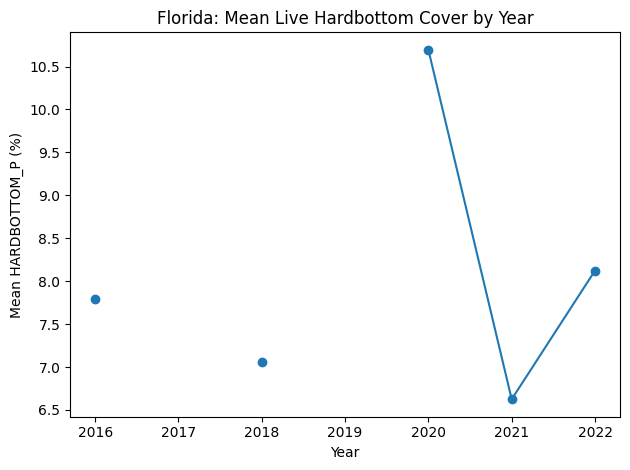

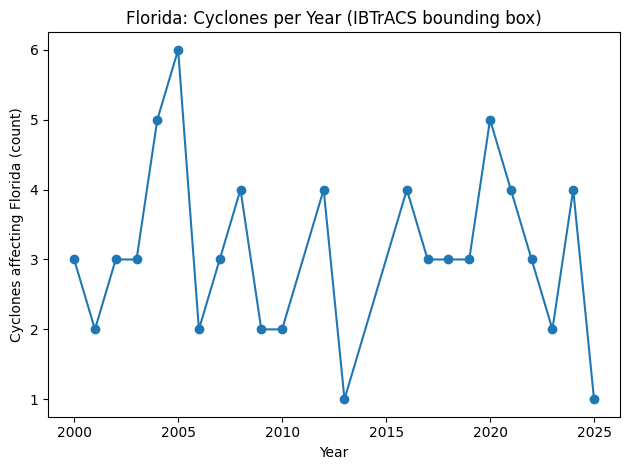

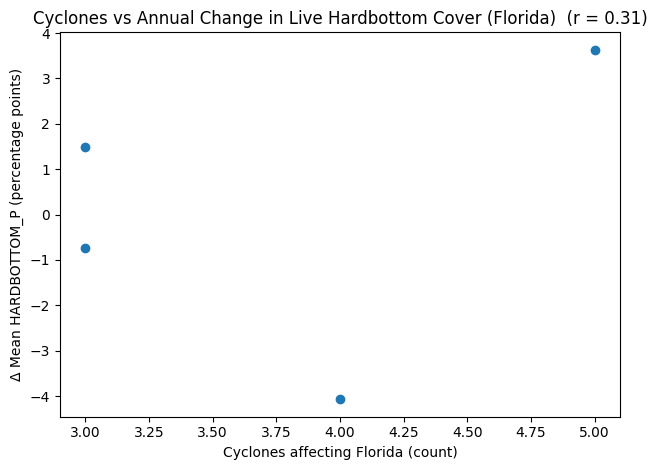

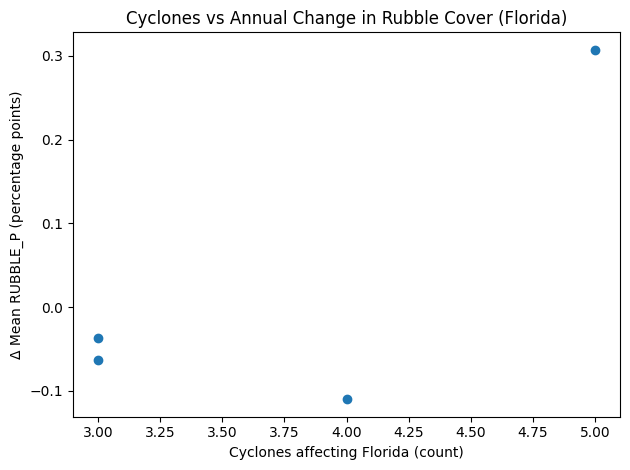

All plots saved and displayed from: ../../outputs/figures/cyclone_coral

Saved: ../../data/analyzed/fl_cyclones_vs_benthic_annual.csv


In [18]:
# Fix cyclone counting: count UNIQUE SIDs per year (not rows)
# (also count each SID once per year, in case a storm crosses Florida in multiple years)
cyclones["year"] = cyclones["ISO_TIME"].dt.year

fl_points = cyclones[
    (cyclones["LAT"].between(lat_min, lat_max)) &
    (cyclones["LON"].between(lon_min, lon_max))
    ].copy()

fl_storm_years = fl_points.drop_duplicates(subset=["SID", "year"])
cyclones_per_year = (
    fl_storm_years.groupby("year")["SID"]
    .nunique()
    .rename("cyclones")
    .sort_index()
)

print("\nCyclones per year (unique SID):")
print(cyclones_per_year)

# Join the two time series on year
df = pd.concat(
    [cyclones_per_year, annual_hardbottom, annual_hardbottom_delta, annual_rubble, annual_rubble_delta],
    axis=1
).sort_index()

print("\nJoined annual table:")
print(df.round(3))

# Keep only years where we have both cyclones and hardbottom_delta
df_scatter = df.dropna(subset=["cyclones", "hardbottom_delta"]).copy()

corr = df_scatter["cyclones"].corr(df_scatter["hardbottom_delta"]) if len(df_scatter) >= 3 else float("nan")
print(
    f"\nCorrelation (cyclones vs Δ hardbottom): {corr:.3f}" if corr == corr else "\nNot enough points for correlation.")

import matplotlib.pyplot as plt
import os

# directory to save figures
fig_dir = "../../outputs/figures/cyclone_coral"
os.makedirs(fig_dir, exist_ok=True)

# ----------------------------
# 1) Hardbottom cover over time
# ----------------------------
fig, ax = plt.subplots()

ax.plot(df.index, df["hardbottom_mean"], marker="o")
ax.set_xlabel("Year")
ax.set_ylabel("Mean HARDBOTTOM_P (%)")
ax.set_title("Florida: Mean Live Hardbottom Cover by Year")

fig.tight_layout()
fig.savefig(os.path.join(fig_dir, "hardbottom_mean_by_year.png"), dpi=300)
plt.show()
plt.close(fig)

# ----------------------------
# 2) Cyclones per year over time
# ----------------------------
fig, ax = plt.subplots()

ax.plot(df.index, df["cyclones"], marker="o")
ax.set_xlabel("Year")
ax.set_ylabel("Cyclones affecting Florida (count)")
ax.set_title("Florida: Cyclones per Year (IBTrACS bounding box)")

fig.tight_layout()
fig.savefig(os.path.join(fig_dir, "cyclones_per_year.png"), dpi=300)
plt.show()
plt.close(fig)

# ----------------------------
# 3) Cyclones vs annual coral change
# ----------------------------
fig, ax = plt.subplots()

ax.scatter(df_scatter["cyclones"], df_scatter["hardbottom_delta"])
ax.set_xlabel("Cyclones affecting Florida (count)")
ax.set_ylabel("Δ Mean HARDBOTTOM_P (percentage points)")

title = "Cyclones vs Annual Change in Live Hardbottom Cover (Florida)"
if corr == corr:
    title += f"  (r = {corr:.2f})"
ax.set_title(title)

fig.tight_layout()
fig.savefig(os.path.join(fig_dir, "cyclones_vs_hardbottom_delta.png"), dpi=300)
plt.show()
plt.close(fig)

# ----------------------------
# 4) Cyclones vs rubble change
# ----------------------------
df_scatter2 = df.dropna(subset=["cyclones", "rubble_delta"]).copy()

fig, ax = plt.subplots()

ax.scatter(df_scatter2["cyclones"], df_scatter2["rubble_delta"])
ax.set_xlabel("Cyclones affecting Florida (count)")
ax.set_ylabel("Δ Mean RUBBLE_P (percentage points)")
ax.set_title("Cyclones vs Annual Change in Rubble Cover (Florida)")

fig.tight_layout()
fig.savefig(os.path.join(fig_dir, "cyclones_vs_rubble_delta.png"), dpi=300)
plt.show()
plt.close(fig)

print(f"All plots saved and displayed from: {fig_dir}")

# Save the joined table if you want
out_path = "../../data/analyzed/fl_cyclones_vs_benthic_annual.csv"
df.to_csv(out_path, index=True)
print(f"\nSaved: {out_path}")